In [1]:
from keras.models import Sequential
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 384)       1

In [4]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
data_dir = "/kaggle/input/flowers-recognition/flowers"

In [6]:

datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

training_set = datagen.flow_from_directory(directory = data_dir,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 subset='training')

test_set = datagen.flow_from_directory(directory = data_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical',
                                            subset='validation')

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [7]:
#learning_rate=0.0001

In [8]:
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)

In [9]:
history = model.fit(training_set,
          steps_per_epoch=training_set.n//64,
          epochs=50,
          validation_data=test_set,
          validation_steps=test_set.n//64,)

Epoch 1/50
54/54 [==============================] - 30s 393ms/step - loss: 1.5793 - accuracy: 0.2605 - val_loss: 1.3673 - val_accuracy: 0.3990
Epoch 2/50
54/54 [==============================] - 14s 256ms/step - loss: 1.3175 - accuracy: 0.3807 - val_loss: 1.2926 - val_accuracy: 0.3726
Epoch 3/50
54/54 [==============================] - 11s 195ms/step - loss: 1.2292 - accuracy: 0.4526 - val_loss: 1.2285 - val_accuracy: 0.4327
Epoch 4/50
54/54 [==============================] - 10s 177ms/step - loss: 1.1941 - accuracy: 0.4815 - val_loss: 1.1781 - val_accuracy: 0.5433
Epoch 5/50
54/54 [==============================] - 9s 168ms/step - loss: 1.0827 - accuracy: 0.5538 - val_loss: 1.1571 - val_accuracy: 0.4880
Epoch 6/50
54/54 [==============================] - 8s 155ms/step - loss: 1.0230 - accuracy: 0.5816 - val_loss: 1.0061 - val_accuracy: 0.5769
Epoch 7/50
54/54 [==============================] - 9s 169ms/step - loss: 0.9702 - accuracy: 0.6105 - val_loss: 0.9470 - val_accuracy: 0.5938
Ep

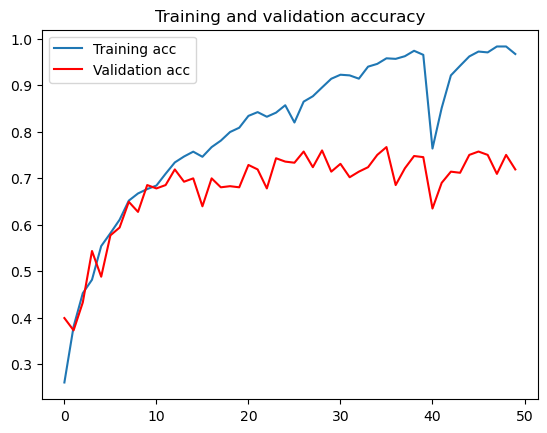

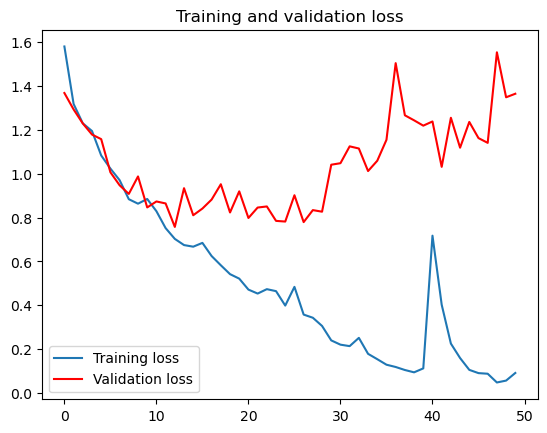

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc,label='Training acc')
plt.plot(val_acc,color='red',label='Validation acc')
plt.xlabel='epochs'
plt.ylabel='accuracy'
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(loss,label='Training loss')
plt.plot(val_loss,color='red',label='Validation loss')
plt.xlabel='epochs'
plt.ylabel='loss'
plt.title('Training and validation loss')
plt.legend()

plt.show()

1/1 [==============================] - 0s 139ms/step
Classified: sunflower


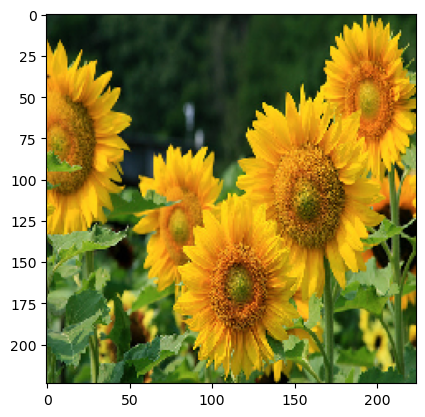

In [11]:
from keras.utils import load_img
img = tf.keras.utils.load_img('/kaggle/input/flowers-recognition/flowers/sunflower/1008566138_6927679c8a.jpg', target_size=(224,224))
img = tf.keras.utils.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0

p = model.predict(img)
labels = {0: 'daisy', 1: 'dandelion', 2: 'rose', 3: 'sunflower', 4: 'tulip'}
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:", predicted_class)

plt.show()
plt.imshow(img[0])

1/1 [==============================] - 0s 22ms/step
Classified: tulip


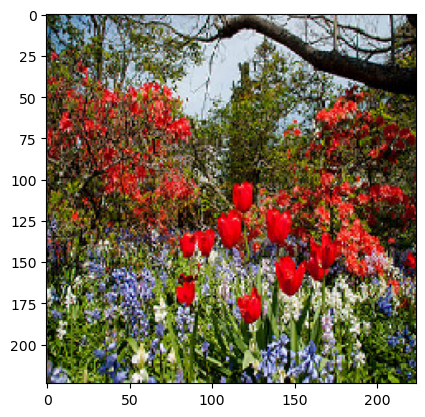

In [12]:
from keras.utils import load_img
img = tf.keras.utils.load_img('/kaggle/input/flowers-recognition/flowers/tulip/10163955604_ae0b830975_n.jpg', target_size=(224,224))
img = tf.keras.utils.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0

p = model.predict(img)
labels = {0: 'daisy', 1: 'dandelion', 2: 'rose', 3: 'sunflower', 4: 'tulip'}
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:", predicted_class)

plt.show()
plt.imshow(img[0])

109/109 [==============================] - 10s 92ms/step


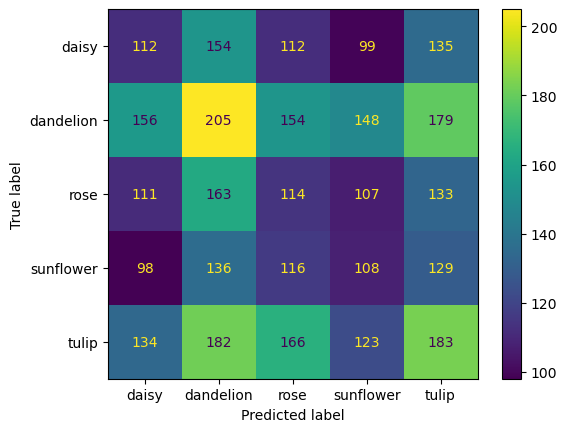

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# Make predictions on the test set
y_pred = model.predict(training_set)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels
y_true = training_set.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['daisy','dandelion','rose','sunflower','tulip'])
disp.plot()
plt.show()
